In [1]:
import os, random
import numpy as np
import pandas as pd
from tqdm import tqdm

import kagglehub

Vamos a importar todos los datos que necesitaremos, al principio sólo serán importante los ratings, pero el resto de información nos podrá servir para sacar conclusiones.

In [2]:
path = kagglehub.dataset_download("ruchi798/bookcrossing-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\ruchi798\bookcrossing-dataset\versions\3


In [3]:
book_reviews_path = os.path.join(path, 'Book reviews', 'Book reviews')

book_ratings_path = os.path.join(book_reviews_path, 'BX-Book-Ratings.csv')
books_path = os.path.join(book_reviews_path, 'BX_Books.csv')
users_path = os.path.join(book_reviews_path, 'BX-Users.csv')

data_path = os.path.join(path, 'Books Data with Category Language and Summary', 'Preprocessed_data.csv')

In [4]:
book_ratings_df = pd.read_csv(book_ratings_path, sep=';', encoding='latin-1')
book_ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
books_df = pd.read_csv(books_path, sep=';', encoding='latin-1')
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
books_df['ISBN'].duplicated().sum()

0

In [7]:
ISBN_to_index = pd.Series(books_df.index, index=books_df['ISBN'])
ISBN_to_index

ISBN
0195153448         0
0002005018         1
0060973129         2
0374157065         3
0393045218         4
               ...  
0440400988    271374
0525447644    271375
006008667X    271376
0192126040    271377
0767409752    271378
Length: 271379, dtype: int64

In [8]:
books_df['ISBN'].to_dict()

{0: '0195153448',
 1: '0002005018',
 2: '0060973129',
 3: '0374157065',
 4: '0393045218',
 5: '0399135782',
 6: '0425176428',
 7: '0671870432',
 8: '0679425608',
 9: '074322678X',
 10: '0771074670',
 11: '080652121X',
 12: '0887841740',
 13: '1552041778',
 14: '1558746218',
 15: '1567407781',
 16: '1575663937',
 17: '1881320189',
 18: '0440234743',
 19: '0452264464',
 20: '0609804618',
 21: '1841721522',
 22: '1879384493',
 23: '0061076031',
 24: '0439095026',
 25: '0689821166',
 26: '0971880107',
 27: '0345402871',
 28: '0345417623',
 29: '0684823802',
 30: '0375759778',
 31: '0425163091',
 32: '3404921038',
 33: '3442353866',
 34: '3442410665',
 35: '3442446937',
 36: '0375406328',
 37: '0446310786',
 38: '0449005615',
 39: '0060168013',
 40: '038078243X',
 41: '055321215X',
 42: '067176537X',
 43: '0061099686',
 44: '0553582909',
 45: '0671888587',
 46: '0553582747',
 47: '0425182908',
 48: '042518630X',
 49: '0440223571',
 50: '0812523873',
 51: '0842342702',
 52: '0440225701',
 53

In [9]:
users_df = pd.read_csv(users_path, sep=';', encoding='latin-1')
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [10]:
assert users_df['User-ID'].duplicated().sum() == 0
assert users_df['User-ID'].is_monotonic_increasing

In [11]:
book_ratings_df['User-ID'] -= 1
users_df['User-ID'] -= 1

In [12]:
users_df.index.rename('User-ID', inplace=True)
users_df.drop(columns='User-ID', inplace=True)
users_df

,Location,Age
User-ID,,
0,"nyc, new york, usa",NaN
1,"stockton, california, usa",18.0
2,"moscow, yukon territory, russia",NaN
3,"porto, v.n.gaia, portugal",17.0
4,"farnborough, hants, united kingdom",NaN
...,...,...
278853,"portland, oregon, usa",NaN
278854,"tacoma, washington, united kingdom",50.0
278855,"brampton, ontario, canada",NaN


In [13]:
# En MiB
users_df.memory_usage(deep=True).sum() / 1024**2, books_df.memory_usage(deep=True).sum() / 1024**2, book_ratings_df.memory_usage(deep=True).sum() / 1024**2

(22.331958770751953, 157.61188507080078, 82.24126815795898)

In [14]:
book_ratings_df.ISBN.head()

0    034545104X
1    0155061224
2    0446520802
3    052165615X
4    0521795028
Name: ISBN, dtype: object

In [15]:
nonexistent_bookratings = pd.isna(book_ratings_df.ISBN.map(ISBN_to_index))
book_ratings_df = book_ratings_df[~nonexistent_bookratings]

In [16]:
book_ratings_df['book_index'] = book_ratings_df.ISBN.map(ISBN_to_index)
book_ratings_df.drop(columns='ISBN', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_30408\1945880113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_ratings_df['book_index'] = book_ratings_df.ISBN.map(ISBN_to_index)
C:\Users\PC\AppData\Local\Temp\ipykernel_30408\1945880113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_ratings_df.drop(columns='ISBN', inplace=True)


In [17]:
book_ratings_df

,User-ID,Book-Rating,book_index
0,276724,0,2966
1,276725,5,225829
2,276726,0,11054
3,276728,3,246854
4,276728,6,246855
...,...,...,...
1149774,276703,0,69546
1149775,276703,9,69547
1149776,276705,0,52543
1149777,276708,10,15979


Hemos comprobado un problema con los algoritmos de recomendación. 
Se trata de que no son todos compatibles con el mismo tipo de split entre train y test.

En el caso de KNN, el split es sólo respecto a los usuarios ya que el modelo 
sólo puede predecir sobre items que ya ha visto algún usuario.

En los otros casos por la naturaleza iterativa y de aprendizaje de los 
entrenamientos, con las fórmulas dadas en clase no podemos inferir los 
factores de un usuario que no haya estado en el entranamiento ni tampoco 
de un item en la misma situación. Entonces el split no puede ser respecto a 
usuarios o items, sino que tiene que ser respecto a los ratings.

In [18]:
USERS = users_df.shape[0]
ITEMS = books_df.shape[0]
try:
    ratings_usr_split = np.full((USERS, ITEMS), np.nan)
except MemoryError as e:
    print(e)

Unable to allocate 564. GiB for an array with shape (278858, 271379) and data type float64


Vamos a reducir por 20 el tamaño (en ambas dimensiones) para asegurarnos de que pueda ejecutarse el código. Idealmente se trabajaría con arrays dispersos, pero las implementaciones que hay no permiten tanta versatilidad como trabajar con numpy.

Para reducirlos vamos a quedarnos con los usuarios que más libros han evaluado, sino fuera así la matriz se volvería extremadamente dispersa al haber reducido tanto en usuarios como libres y habría muy pocos datos para comparar usuarios.

In [19]:
USERS = len(users_df) // 20
ITEMS = len(books_df) // 20

In [20]:
reduced_users = book_ratings_df.groupby('User-ID').size().sort_values(ascending=False).index[:USERS]
reduced_users = [*reduced_users]
random.seed(13)
random.shuffle(reduced_users) # For sampling

In [21]:
old_to_new_userid = pd.Series(
    range(len(reduced_users)), index=reduced_users
).rename('User-ID')
new_to_old_userid = pd.Series(
    reduced_users, index=range(len(reduced_users))
).rename('User-ID')
old_to_new_userid

152427        0
103149        1
189781        2
219991        3
56101         4
          ...  
86683     13937
2398      13938
191884    13939
72862     13940
265625    13941
Name: User-ID, Length: 13942, dtype: int64

In [22]:
reduced_users_df = users_df.loc[reduced_users].reset_index(drop=True)
reduced_users_df.index.rename('new_userid', inplace=True)
reduced_users_df

,Location,Age
new_userid,,
0,"christchurch, canterbury, new zealand",26.0
1,"wuppertal, nordrhein-westfalen, germany",21.0
2,"marionville, missouri, usa",NaN
3,"vancouver, british columbia, canada",NaN
4,"sammamish, washington, usa",NaN
...,...,...
13937,"auckland, n/a, new zealand",45.0
13938,"kent, ohio, usa",32.0
13939,"stratford, prince edward island, canada",NaN


In [23]:
valid_userids = set(reduced_users)
reduced_ratings_df_temp = book_ratings_df[book_ratings_df['User-ID'].isin(valid_userids)].reset_index(drop=True)
reduced_ratings_df_temp['User-ID'] = reduced_ratings_df_temp['User-ID'].map(old_to_new_userid)
reduced_ratings_df_temp

,User-ID,Book-Rating,book_index
0,13630,9,4779
1,13630,0,25797
2,13630,0,7154
3,13630,9,1836
4,13630,8,6276
...,...,...,...
887610,7111,7,881
887611,7111,0,5309
887612,7111,5,69544
887613,7111,0,69546


In [24]:
reduced_books = reduced_ratings_df_temp.groupby('book_index').size().sort_values(ascending=False).index[:ITEMS]
reduced_books

Index([   26,   408,   748,  1105,   522,   356,  1922,   118,   456,   305,
       ...
       47325, 28957, 47433, 21522, 24975, 43423, 60330, 57067, 21495, 68058],
      dtype='int64', name='book_index', length=13568)

In [25]:
old_to_new_bookid = pd.Series(
    range(len(reduced_books)), index=reduced_books
).rename('User-ID')
new_to_old_bookid = pd.Series(
    reduced_books, index=range(len(reduced_books))
).rename('User-ID')
old_to_new_bookid

book_index
26           0
408          1
748          2
1105         3
522          4
         ...  
43423    13563
60330    13564
57067    13565
21495    13566
68058    13567
Name: User-ID, Length: 13568, dtype: int64

In [26]:
reduced_books_df = books_df.loc[reduced_books].reset_index(drop=True)
reduced_books_df.index.rename('new_bookid', inplace=True)
reduced_books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
new_bookid,,,,,,,,
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
...,...,...,...,...,...,...,...,...
13563,0316058432,Mr. Popper's Penguins,Richard Atwater,1992,"Little, Brown",http://images.amazon.com/images/P/0316058432.0...,http://images.amazon.com/images/P/0316058432.0...,http://images.amazon.com/images/P/0316058432.0...
13564,0840734247,A Skeleton In God's Closet,Paul Maier,1993,WestBow Press,http://images.amazon.com/images/P/0840734247.0...,http://images.amazon.com/images/P/0840734247.0...,http://images.amazon.com/images/P/0840734247.0...
13565,0373835280,Forever and Always,Lori Foster,2002,Harlequin,http://images.amazon.com/images/P/0373835280.0...,http://images.amazon.com/images/P/0373835280.0...,http://images.amazon.com/images/P/0373835280.0...


In [27]:
valid_bookids = set(reduced_books)
reduced_ratings_df = reduced_ratings_df_temp[reduced_ratings_df_temp['book_index'].isin(valid_bookids)].reset_index(drop=True)
reduced_ratings_df['book_index'] = reduced_ratings_df['book_index'].map(old_to_new_bookid)
reduced_ratings_df

,User-ID,Book-Rating,book_index
0,13630,9,1391
1,13630,0,821
2,13630,0,6890
3,13630,9,837
4,13630,8,2569
...,...,...,...
404483,7111,0,2140
404484,7111,0,1515
404485,7111,0,597
404486,7111,7,723


In [28]:
train_split = 0.9
TRAIN_USERS = round(reduced_users_df.shape[0] * train_split)
ITEMS = reduced_books_df.shape[0]
ratings_usr_train = np.full((TRAIN_USERS, ITEMS), np.nan)
ratings_usr_test = np.full((USERS - TRAIN_USERS, ITEMS), np.nan)

In [29]:
for _, (user, rating, book) in reduced_ratings_df.iterrows():
    if user >= TRAIN_USERS:
        ratings_usr_test[user - TRAIN_USERS, book] = rating
    else:
        ratings_usr_train[user, book] = rating

In [30]:
ratings_usr_train

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [31]:
# A lo mejor es más facil tenerlo todo en una función. Pongo por aquí una q no está probada:

def reduce_dataset(book_ratings_df, users_df, books_df, 
                   scale_factor=15, train_split=0.9, seed=13):
    USERS = len(users_df) // scale_factor
    ITEMS = len(books_df) // scale_factor

    top_users = book_ratings_df.groupby('User-ID').size().sort_values(ascending=False).index[:USERS]
    reduced_users = list(top_users)
    random.seed(seed)
    random.shuffle(reduced_users)

    old_to_new_userid = pd.Series(range(len(reduced_users)), index=reduced_users).rename('User-ID')
    new_to_old_userid = pd.Series(reduced_users, index=range(len(reduced_users))).rename('User-ID')

    # Map users
    valid_userids = set(reduced_users)
    reduced_users_df = users_df.loc[valid_userids].copy()
    reduced_users_df = reduced_users_df.reset_index(drop=False).rename(columns={"User-ID": "old_userid"})
    reduced_users_df["new_userid"] = reduced_users_df["old_userid"].map(old_to_new_userid)

    reduced_ratings_df_temp = book_ratings_df[book_ratings_df['User-ID'].isin(valid_userids)].copy()
    reduced_ratings_df_temp['User-ID'] = reduced_ratings_df_temp['User-ID'].map(old_to_new_userid)

    # Most evaluated books
    top_books = reduced_ratings_df_temp.groupby('book_index').size().sort_values(ascending=False).index[:ITEMS]
    reduced_books = list(top_books)

    # Map book index
    old_to_new_bookid = pd.Series(range(len(reduced_books)), index=reduced_books).rename('book_index')
    new_to_old_bookid = pd.Series(reduced_books, index=range(len(reduced_books))).rename('book_index')
    
    valid_bookids = set(reduced_books)
    reduced_books_df = books_df.loc[valid_bookids].copy()
    reduced_books_df = reduced_books_df.reset_index(drop=False).rename(columns={"index": "old_bookid"})
    reduced_books_df["new_bookid"] = reduced_books_df["old_bookid"].map(old_to_new_bookid)

    reduced_ratings_df = reduced_ratings_df_temp[reduced_ratings_df_temp['book_index'].isin(valid_bookids)].copy()
    reduced_ratings_df['book_index'] = reduced_ratings_df['book_index'].map(old_to_new_bookid)
    reduced_ratings_df.reset_index(drop=True, inplace=True)

    # Split by users
    TRAIN_USERS = round(len(reduced_users_df) * train_split)
    TOTAL_USERS = len(reduced_users_df)
    TOTAL_ITEMS = len(reduced_books_df)

    ratings_usr_train = np.full((TRAIN_USERS, TOTAL_ITEMS), np.nan)
    ratings_usr_test = np.full((TOTAL_USERS - TRAIN_USERS, TOTAL_ITEMS), np.nan)

    for _, row in reduced_ratings_df.iterrows():
        user = row['User-ID']
        item = row['book_index']
        rating = row['Book-Rating']
        if user < TRAIN_USERS:
            ratings_usr_train[user, item] = rating
        else:
            ratings_usr_test[user - TRAIN_USERS, item] = rating

    return {
        "train_matrix": ratings_usr_train,
        "test_matrix": ratings_usr_test,
        "reduced_users_df": reduced_users_df,
        "reduced_books_df": reduced_books_df,
        "reduced_ratings_df": reduced_ratings_df,
        "user_maps": {
            "old_to_new": old_to_new_userid,
            "new_to_old": new_to_old_userid
        },
        "book_maps": {
            "old_to_new": old_to_new_bookid,
            "new_to_old": new_to_old_bookid
        }
    }


# Metrics

In [32]:
import warnings

In [33]:
def get_mae_2d(true: np.ndarray, predictions: np.ndarray) -> float:
    ae = np.abs(true - predictions)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
    
        ae_per_user = ae.mean(axis=1, where=~np.isnan(true))
        return ae_per_user.mean(where=~np.isnan(ae_per_user))

In [34]:
def get_rmse_2d(true: np.ndarray, predictions: np.ndarray) -> float:
    se = (true - predictions)**2
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
    
        rmse_per_user = np.sqrt(se.mean(axis=1, where=~np.isnan(true)))
        return rmse_per_user.mean(where=~np.isnan(rmse_per_user))

In [35]:
def get_precision_2d(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    threshold = np.quantile(true[~np.isnan(true)],q)
    intersection = ~np.isnan(true) & ~np.isnan(predictions)
    predictions = np.where(predictions[intersection] >= threshold, 1, 0)
    true = np.where(true[intersection] >= threshold, 1, 0)
    return np.sum(predictions * true) / np.sum(predictions) if np.sum(predictions) > 0 else 0.0

In [36]:
def get_recall_2d(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    threshold = np.quantile(true[~np.isnan(true)],q)
    intersection = ~np.isnan(true) & ~np.isnan(predictions)
    predictions = np.where(predictions[intersection] >= threshold, 1, 0)
    true = np.where(true[intersection] >= threshold, 1, 0)
    return np.sum(predictions * true) / np.sum(true) if np.sum(predictions) > 0 else 0.0

In [37]:
def get_f1_2d(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    precision = get_precision_2d(true, predictions, q)
    recall = get_recall_2d(true, predictions, q)
    
    if precision + recall == 0:
        return 0.0
    else:
        return 2 * (precision * recall) / (precision + recall)

In [38]:
def has_test_ratings(ratings_u):
    return (~np.isnan(ratings_u)).any()

def get_ordered_test_items(ratings_u):
    rated_items = np.where(~np.isnan(ratings_u))[0]
    ratings = ratings_u[rated_items]
    ordered_indices = rated_items[np.argsort(-ratings)]
    return ordered_indices

def get_user_idcg(ratings_u):
    items = get_ordered_test_items(ratings_u)
    if len(items) == 0:
        return 0
    ratings = ratings_u[items]
    positions = np.arange(1, len(items) + 1)
    idcg = np.sum((2**ratings - 1) / np.log2(positions + 1))
    return idcg

def get_user_dcg(ratings_u, recommendations):
    recommendations = np.array([i for i in recommendations if i is not None])
    known_mask = ~np.isnan(ratings_u[recommendations])

    valid_recs = recommendations[known_mask]
    if len(valid_recs) == 0:
        return 0
    ratings = ratings_u[valid_recs]
    positions = np.arange(1, len(valid_recs) + 1)
    dcg = np.sum((2**ratings - 1) / np.log2(positions + 1))
    return dcg

def get_user_ndcg(ratings_u, recommendations):
    dcg = get_user_dcg(ratings_u, recommendations)
    idcg = get_user_idcg(ratings_u)
    if idcg == 0:
        return 0
    else:
        return dcg / idcg

def get_ndcg(true, recommendations):
    ndcg_sum = 0
    count = 0
    for u in range(len(true)):
        if has_test_ratings(u) and len(recommendations[u]) > 0:
            user_ndcg = get_user_ndcg(true[u], recommendations[u])
            if user_ndcg is not None:
                ndcg_sum += user_ndcg
                count += 1
    return ndcg_sum / count if count > 0 else None

In [39]:
def get_user_dcg_sparse(ratings_u: dict[int, int], recommendations):
    valid_recs = [rec for rec in recommendations if rec in ratings_u]
    if len(valid_recs) == 0:
        return 0
    ratings = np.array([ratings_u[rec] for rec in valid_recs])
    positions = np.arange(1, len(valid_recs) + 1)
    dcg = np.sum((2**ratings - 1) / np.log2(positions + 1))
    return dcg

def get_user_ndcg_sparse(ratings_u: dict[int, int], recommendations):
    dcg = get_user_dcg_sparse(ratings_u, recommendations)
    idcg = get_user_idcg(np.array([*ratings_u.values()]))
    if idcg == 0:
        return 0
    else:
        return dcg / idcg

def get_ndcg_sparse(true: dict[dict[int, int]], recommendations):
    ndcg_sum = 0
    count = 0
    for u in range(len(true)):
        if u in true:
            user_ndcg = get_user_ndcg_sparse(true[u], recommendations[u])
            if user_ndcg is not None:
                ndcg_sum += user_ndcg
                count += 1
    return ndcg_sum / count if count > 0 else None

In [40]:
a = {1:1, 2:2}
np.array([*a.values()])

array([1, 2])

In [41]:
def get_mae(true: np.ndarray, predictions: np.ndarray) -> float:
    ae = np.abs(true - predictions)
    return ae.mean()

In [42]:
def get_rmse(true: np.ndarray, predictions: np.ndarray) -> float:
    se = (true - predictions)**2
    return np.sqrt(se.mean())

In [43]:
def get_precision(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    threshold = np.quantile(true, q)
    predictions = np.where(predictions >= threshold, 1, 0)
    true = np.where(true >= threshold, 1, 0)
    return np.sum(predictions * true) / np.sum(predictions) if np.sum(predictions) > 0 else 0.0

In [44]:
def get_recall(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    threshold = np.quantile(true, q)
    predictions = np.where(predictions >= threshold, 1, 0)
    true = np.where(true >= threshold, 1, 0)
    return np.sum(predictions * true) / np.sum(true) if np.sum(predictions) > 0 else 0.0

In [45]:
def get_f1(true: np.ndarray, predictions: np.ndarray, q: float = 0.5) -> float:
    precision = get_precision(true, predictions, q)
    recall = get_recall(true, predictions, q)
    
    if precision + recall == 0:
        return 0.0
    else:
        return 2 * (precision * recall) / (precision + recall)

# KNN

In [46]:
from models import KNN

In [47]:
knn_model_jmsd = KNN(k=10, similarity_kind='jmsd')
knn_model_jmsd.fit(ratings_usr_train)

In [48]:
u = 3
i = np.isnan(ratings_usr_train[u, :]).argmin()

In [49]:
# Test de funcionamiento
knn_model_jmsd.predict(ratings_usr_train[u], i, prediction_mode='weighted_average'), ratings_usr_train[u][i]

(0.6659744255779086, 0.0)

In [50]:
u = 3
knn_model_jmsd.recommend(ratings_usr_test[u], 10, prediction_mode='weighted_average')

array([ 160,  709, 2361, 3057,  961, 9064, 2807,   14,  195, 1697],
      dtype=int64)

In [51]:
recommendations = knn_model_jmsd.recommend(ratings_usr_test[u], 3, prediction_mode='average')
predictions = knn_model_jmsd.predict_all(ratings_usr_test[u], prediction_mode='average')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{14: 8.0, 9064: 8.0, 1697: 10.0}

In [52]:
recommendations = knn_model_jmsd.recommend(ratings_usr_test[u], 3, prediction_mode='weighted_average')
predictions = knn_model_jmsd.predict_all(ratings_usr_test[u], prediction_mode='weighted_average')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{14: 8.0, 9064: 8.0, 1697: 10.0}

In [53]:
recommendations = knn_model_jmsd.recommend(ratings_usr_test[u], 3, prediction_mode='deviation_from_mean')
predictions = knn_model_jmsd.predict_all(ratings_usr_test[u], prediction_mode='deviation_from_mean')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{487: 7.75, 1697: 8.722222222222221, 10121: 8.333333333333332}

In [54]:
knn_model_corr = KNN(k=10, similarity_kind='correlation')
knn_model_corr.fit(ratings_usr_train)

In [55]:
recommendations = knn_model_corr.recommend(ratings_usr_test[u], 3, prediction_mode='average')
predictions = knn_model_corr.predict_all(ratings_usr_test[u], prediction_mode='average')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{1115: 10.0, 117: 10.0, 5895: 10.0}

In [56]:
recommendations = knn_model_corr.recommend(ratings_usr_test[u], 3, prediction_mode='weighted_average')
predictions = knn_model_corr.predict_all(ratings_usr_test[u], prediction_mode='weighted_average')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{1115: 10.0, 117: 10.0, 5895: 10.0}

In [57]:
recommendations = knn_model_corr.recommend(ratings_usr_test[u], 3, prediction_mode='deviation_from_mean')
predictions = knn_model_corr.predict_all(ratings_usr_test[u], prediction_mode='deviation_from_mean')
dict(zip(recommendations, predictions[recommendations])) # Estimated scores for the recommended items

{2950: 11.365148861646235, 4823: 11.66, 6475: 11.66}

In [58]:
TEST_USERS = USERS - TRAIN_USERS

In [59]:
valid_test_ratings = ratings_usr_test[~np.isnan(ratings_usr_test)]
mask = np.random.rand(*ratings_usr_test.shape) > 0.9
mask = mask & ~np.isnan(ratings_usr_test)
test_items_test_users_ratings = np.where(mask, ratings_usr_test, np.nan)
train_items_test_users_ratings = np.where(~mask, ratings_usr_test, np.nan)

In [60]:
# ETA: 5-6 horas
predictions_corr_avg = np.array([knn_model_corr.predict_all(train_items_test_users_ratings[u], prediction_mode='average') for u in tqdm(range(TEST_USERS))])
predictions_corr_wavg = np.array([knn_model_corr.predict_all(train_items_test_users_ratings[u], prediction_mode='weighted_average') for u in tqdm(range(TEST_USERS))])
predictions_corr_dmean = np.array([knn_model_corr.predict_all(train_items_test_users_ratings[u], prediction_mode='deviation_from_mean') for u in tqdm(range(TEST_USERS))])
predictions_jmsd_avg = np.array([knn_model_jmsd.predict_all(train_items_test_users_ratings[u], prediction_mode='average') for u in tqdm(range(TEST_USERS))])
predictions_jmsd_wavg = np.array([knn_model_jmsd.predict_all(train_items_test_users_ratings[u], prediction_mode='weighted_average') for u in tqdm(range(TEST_USERS))])
predictions_jmsd_dmean = np.array([knn_model_jmsd.predict_all(train_items_test_users_ratings[u], prediction_mode='deviation_from_mean') for u in tqdm(range(TEST_USERS))])

100%|██████████| 1394/1394 [22:00<00:00,  1.06it/s]


In [61]:
N = 5
recommendations_corr_avg = [knn_model_corr.recommend(train_items_test_users_ratings[u], N, prediction_mode='average', predictions=predictions_corr_avg[u], sorted=True) for u in tqdm(range(TEST_USERS))]
recommendations_corr_wavg = [knn_model_corr.recommend(train_items_test_users_ratings[u], N, prediction_mode='weighted_average', predictions=predictions_corr_wavg[u], sorted=True) for u in tqdm(range(TEST_USERS))]
recommendations_corr_dmean = [knn_model_corr.recommend(train_items_test_users_ratings[u], N, prediction_mode='deviation_from_mean', predictions=predictions_corr_dmean[u], sorted=True) for u in tqdm(range(TEST_USERS))]
recommendations_jmsd_avg = [knn_model_jmsd.recommend(train_items_test_users_ratings[u], N, prediction_mode='average', predictions=predictions_jmsd_avg[u], sorted=True) for u in tqdm(range(TEST_USERS))]
recommendations_jmsd_wavg = [knn_model_jmsd.recommend(train_items_test_users_ratings[u], N, prediction_mode='weighted_average', predictions=predictions_jmsd_wavg[u], sorted=True) for u in tqdm(range(TEST_USERS))]
recommendations_jmsd_dmean = [knn_model_jmsd.recommend(train_items_test_users_ratings[u], N, prediction_mode='deviation_from_mean', predictions=predictions_jmsd_dmean[u], sorted=True) for u in tqdm(range(TEST_USERS))]

100%|██████████| 1394/1394 [00:00<00:00, 14729.28it/s]


In [62]:
print('MAE (correlation, average):', get_mae_2d(test_items_test_users_ratings, predictions_corr_avg))
print('MAE (correlation, weighted average):', get_mae_2d(test_items_test_users_ratings, predictions_corr_wavg))
print('MAE (correlation, deviation from mean):', get_mae_2d(test_items_test_users_ratings, predictions_corr_dmean))
print('MAE (jmsd, average):', get_mae_2d(test_items_test_users_ratings, predictions_jmsd_avg))
print('MAE (jmsd, weighted average):', get_mae_2d(test_items_test_users_ratings, predictions_jmsd_wavg))
print('MAE (jmsd, deviation from mean):', get_mae_2d(test_items_test_users_ratings, predictions_jmsd_dmean))

MAE (correlation, average): 3.827745098039216
MAE (correlation, weighted average): 3.827728781279957
MAE (correlation, deviation from mean): 3.7163188757428665
MAE (jmsd, average): 4.19013949013949
MAE (jmsd, weighted average): 4.142875456639792
MAE (jmsd, deviation from mean): 4.516148495949642


In [63]:
print('RMSE (correlation, average):', get_rmse_2d(test_items_test_users_ratings, predictions_corr_avg))
print('RMSE (correlation, weighted average):', get_rmse_2d(test_items_test_users_ratings, predictions_corr_wavg))
print('RMSE (correlation, deviation from mean):', get_rmse_2d(test_items_test_users_ratings, predictions_corr_dmean))
print('RMSE (jmsd, average):', get_rmse_2d(test_items_test_users_ratings, predictions_jmsd_avg))
print('RMSE (jmsd, weighted average):', get_rmse_2d(test_items_test_users_ratings, predictions_jmsd_wavg))
print('RMSE (jmsd, deviation from mean):', get_rmse_2d(test_items_test_users_ratings, predictions_jmsd_dmean))

RMSE (correlation, average): 3.855592682483948
RMSE (correlation, weighted average): 3.8555763657246906
RMSE (correlation, deviation from mean): 3.744049060951511
RMSE (jmsd, average): 4.271616070644062
RMSE (jmsd, weighted average): 4.23011176170355
RMSE (jmsd, deviation from mean): 4.627633728460946


In [64]:
# Todas las que recomienda son buenas
print('Precision (correlation, average):', get_precision_2d(test_items_test_users_ratings, predictions_corr_avg))
print('Precision (correlation, weighted average):', get_precision_2d(test_items_test_users_ratings, predictions_corr_wavg))
print('Precision (correlation, deviation from mean):', get_precision_2d(test_items_test_users_ratings, predictions_corr_dmean))
print('Precision (jmsd, average):', get_precision_2d(test_items_test_users_ratings, predictions_jmsd_avg))
print('Precision (jmsd, weighted average):', get_precision_2d(test_items_test_users_ratings, predictions_jmsd_wavg))
print('Precision (jmsd, deviation from mean):', get_precision_2d(test_items_test_users_ratings, predictions_jmsd_dmean))

Precision (correlation, average): 1.0
Precision (correlation, weighted average): 1.0
Precision (correlation, deviation from mean): 1.0
Precision (jmsd, average): 1.0
Precision (jmsd, weighted average): 1.0
Precision (jmsd, deviation from mean): 1.0


In [65]:
# La mayoría de las que son buenas, son recomendadas
print('Recall (correlation, average):', get_recall_2d(test_items_test_users_ratings, predictions_corr_avg))
print('Recall (correlation, weighted average):', get_recall_2d(test_items_test_users_ratings, predictions_corr_wavg))
print('Recall (correlation, deviation from mean):', get_recall_2d(test_items_test_users_ratings, predictions_corr_dmean))
print('Recall (jmsd, average):', get_recall_2d(test_items_test_users_ratings, predictions_jmsd_avg))
print('Recall (jmsd, weighted average):', get_recall_2d(test_items_test_users_ratings, predictions_jmsd_wavg))
print('Recall (jmsd, deviation from mean):', get_recall_2d(test_items_test_users_ratings, predictions_jmsd_dmean))

Recall (correlation, average): 1.0
Recall (correlation, weighted average): 1.0
Recall (correlation, deviation from mean): 0.7615526802218114
Recall (jmsd, average): 1.0
Recall (jmsd, weighted average): 1.0
Recall (jmsd, deviation from mean): 0.6078431372549019


In [66]:
print('F1 (correlation, average):', get_f1_2d(test_items_test_users_ratings, predictions_corr_avg))
print('F1 (correlation, weighted average):', get_f1_2d(test_items_test_users_ratings, predictions_corr_wavg))
print('F1 (correlation, deviation from mean):', get_f1_2d(test_items_test_users_ratings, predictions_corr_dmean))
print('F1 (jmsd, average):', get_f1_2d(test_items_test_users_ratings, predictions_jmsd_avg))
print('F1 (jmsd, weighted average):', get_f1_2d(test_items_test_users_ratings, predictions_jmsd_wavg))
print('F1 (jmsd, deviation from mean):', get_f1_2d(test_items_test_users_ratings, predictions_jmsd_dmean))

F1 (correlation, average): 1.0
F1 (correlation, weighted average): 1.0
F1 (correlation, deviation from mean): 0.8646379853095488
F1 (jmsd, average): 1.0
F1 (jmsd, weighted average): 1.0
F1 (jmsd, deviation from mean): 0.7560975609756097


In [67]:
print('NDCG (correlation, average):', get_ndcg(test_items_test_users_ratings, recommendations_corr_avg))
print('NDCG (correlation, weighted average):', get_ndcg(test_items_test_users_ratings, recommendations_corr_wavg))
print('NDCG (correlation, deviation from mean):', get_ndcg(test_items_test_users_ratings, recommendations_corr_dmean))
print('NDCG (jmsd, average):', get_ndcg(test_items_test_users_ratings, recommendations_jmsd_avg))
print('NDCG (jmsd, weighted average):', get_ndcg(test_items_test_users_ratings, recommendations_jmsd_wavg))
print('NDCG (jmsd, deviation from mean):', get_ndcg(test_items_test_users_ratings, recommendations_jmsd_dmean))

NDCG (correlation, average): 0.00031812913322553906
NDCG (correlation, weighted average): 0.00031812913322553906
NDCG (correlation, deviation from mean): 0.0011654484911920384
NDCG (jmsd, average): 0.0008460236886632825
NDCG (jmsd, weighted average): 0.0008460236886632825
NDCG (jmsd, deviation from mean): 0.0013107246742090992


In [68]:
del predictions_corr_avg
del predictions_corr_dmean
del recommendations_corr_wavg
del predictions_jmsd_avg
del predictions_jmsd_dmean


knn_mae = get_mae_2d(test_items_test_users_ratings, predictions_jmsd_wavg)
knn_rmse = get_rmse_2d(test_items_test_users_ratings, predictions_jmsd_wavg)
knn_precision = get_precision_2d(test_items_test_users_ratings, predictions_jmsd_wavg)
knn_recall = get_recall_2d(test_items_test_users_ratings, predictions_jmsd_wavg)
knn_f1 = get_f1_2d(test_items_test_users_ratings, predictions_jmsd_wavg)
knn_ndcg = get_ndcg(test_items_test_users_ratings, recommendations_jmsd_wavg)

# Matrix Factorization

In [69]:
ratings_df = book_ratings_df.copy()

test_ratings_df = ratings_df.sample(frac=0.05, random_state=13)
train_ratings_df = ratings_df.drop(test_ratings_df.index)

users = train_ratings_df['User-ID'].values
books = train_ratings_df['book_index'].values
ratings = train_ratings_df['Book-Rating'].values

USERS = users_df.shape[0]
ITEMS = books_df.shape[0]

In [70]:
from models import MatrixFactorization
mf = MatrixFactorization(USERS, ITEMS, n_factors=10, seed=123)
mf.fit(users, books, ratings, epochs=10, verbose=2)

Epoch 10: 100%|██████████| 979616/979616 [00:09<00:00, 99202.95it/s] 


In [71]:
test_users = test_ratings_df['User-ID'].values
test_books = test_ratings_df['book_index'].values
test_ratings = test_ratings_df['Book-Rating'].values

predictions_mf = [mf.predict(u, i) for u, i in tqdm(zip(test_users, test_books))]

51559it [00:00, 489679.27it/s]


In [72]:
print('MAE:', get_mae(test_ratings, predictions_mf))
print('RMSE:', get_rmse(test_ratings, predictions_mf))
print('Precision:', get_precision(test_ratings, predictions_mf))
print('Recall:', get_recall(test_ratings, predictions_mf))
print('F1:', get_f1(test_ratings, predictions_mf))

MAE: 2.79302639226787
RMSE: 3.4064239737179958
Precision: 1.0
Recall: 0.9717605073798948
F1: 0.9856780311227401


In [73]:
N = 5
recommendations_mf = {u:mf.recommend(u, N, sorted=True) for u in tqdm(set(test_users))}

100%|██████████| 15875/15875 [01:02<00:00, 252.81it/s]


In [74]:
sparse_test_ratings = dict()
for u, i, r in zip(test_users, test_books, test_ratings):
    if u not in sparse_test_ratings:
        sparse_test_ratings[u] = dict()
    else:
        sparse_test_ratings[u][i] = r
        
sparse_test_ratings

{37537: {408: 0, 1387: 0},
 236282: {105578: 0,
  267761: 0,
  9273: 0,
  3603: 10,
  18478: 0,
  922: 0,
  44109: 10,
  267780: 8,
  215639: 0,
  1713: 0,
  267717: 0,
  2699: 0,
  54191: 0,
  267763: 0,
  2779: 10,
  34779: 0,
  12890: 10,
  61775: 10,
  7998: 0,
  14749: 0,
  19438: 10,
  70520: 10,
  20062: 0,
  267737: 0,
  4077: 10,
  1802: 0,
  29204: 10,
  5618: 0,
  1715: 0,
  90194: 0,
  267786: 0,
  253102: 0,
  4824: 0,
  56339: 0,
  14297: 10,
  200844: 0,
  202076: 0,
  20768: 0,
  50277: 0,
  2703: 0,
  13218: 0,
  267759: 0,
  8723: 0,
  51300: 0,
  267712: 0,
  164012: 0,
  267683: 0,
  46642: 0,
  8681: 10,
  92617: 0,
  5430: 10,
  134431: 10,
  20786: 0},
 93140: {174419: 5, 36323: 0},
 30823: {44311: 0,
  22307: 0,
  58829: 0,
  58780: 0,
  32049: 0,
  11492: 0,
  6757: 0,
  94205: 0,
  1057: 0,
  58801: 0},
 75776: {2884: 0},
 194668: {20393: 7,
  112787: 0,
  9912: 0,
  2290: 0,
  1517: 0,
  45152: 0,
  96073: 8,
  257913: 0,
  116768: 0,
  116522: 0,
  7967: 0,


In [75]:
print('NDCG:', get_ndcg_sparse(sparse_test_ratings, recommendations_mf))

NDCG: 0.0002629662877237445


In [76]:
mf_mae = get_mae(test_ratings, predictions_mf)
mf_rmse = get_rmse(test_ratings, predictions_mf)
mf_precision = get_precision(test_ratings, predictions_mf)
mf_recall = get_recall(test_ratings, predictions_mf)
mf_f1 = get_f1(test_ratings, predictions_mf)
mf_ndcg = get_ndcg_sparse(sparse_test_ratings, recommendations_mf)

# Bernoulli Factorization

In [77]:
from models import BernoulliFactorization
bf = BernoulliFactorization(USERS, ITEMS, 0, 10, n_factors=5, seed=123)
bf.fit(users, books, ratings, epochs=10, verbose=2)

Epoch 10: 100%|██████████| 979616/979616 [00:24<00:00, 40134.77it/s]


In [78]:
test_users = test_ratings_df['User-ID'].values
test_books = test_ratings_df['book_index'].values
test_ratings = test_ratings_df['Book-Rating'].values

predictions_bf = [bf.predict(u, i) for u, i in tqdm(zip(test_users, test_books))]

51559it [00:00, 195840.14it/s]


In [79]:
print('MAE:', get_mae(test_ratings, predictions_bf))
print('RMSE:', get_rmse(test_ratings, predictions_bf))
print('Precision:', get_precision(test_ratings, predictions_bf))
print('Recall:', get_recall(test_ratings, predictions_bf))
print('F1:', get_f1(test_ratings, predictions_bf))

MAE: 3.61389864039256
RMSE: 4.908991564540012
Precision: 1.0
Recall: 1.0
F1: 1.0


In [80]:
N = 5
recommendations_bf = {u:bf.recommend(u, N, sorted=True) for u in tqdm(set(test_users))}

100%|██████████| 15875/15875 [07:22<00:00, 35.88it/s]


In [81]:
print('NDCG:', get_ndcg_sparse(sparse_test_ratings, recommendations_bf))

NDCG: 0.0


In [82]:
bf_mae = get_mae(test_ratings, predictions_bf)
bf_rmse = get_rmse(test_ratings, predictions_bf)
bf_precision = get_precision(test_ratings, predictions_bf)
bf_recall = get_recall(test_ratings, predictions_bf)
bf_f1 = get_f1(test_ratings, predictions_bf)
bf_ndcg = get_ndcg_sparse(sparse_test_ratings, recommendations_bf)

# Neural Networks

In [83]:
from models import NeuralNetwork
nn = NeuralNetwork(USERS, ITEMS, min_rating=0, max_rating=10, latent_dim=128)

In [84]:
nn.fit(users, books, ratings, epochs=50, validation_data=(test_users, test_books, test_ratings))

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1914/1914 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1506 - mae: 0.3492 - val_loss: 0.1366 - val_mae: 0.3245
Epoch 2/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1356 - mae: 0.3176 - val_loss: 0.1313 - val_mae: 0.3103
Epoch 3/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1312 - mae: 0.3070 - val_loss: 0.1290 - val_mae: 0.3077
Epoch 4/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1285 - mae: 0.3008 - val_loss: 0.1270 - val_mae: 0.2955
Epoch 5/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1268 - mae: 0.2968 - val_loss: 0.1265 - val_mae: 0.2985
Epoch 6/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1257 - mae: 0.2943 - val_loss: 0.1252 - val_mae: 0.2923
Epoch 7/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1247 - mae: 0.2920 - val_loss: 0.1244 - val_mae: 0.2939
Epoch 8/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1240 - mae: 0.2902 - val_loss: 0.1241 - val_mae: 0.2949
Epoch 9/50
1914/1914 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

In [85]:
test_users = test_ratings_df['User-ID'].values
test_books = test_ratings_df['book_index'].values
test_ratings = test_ratings_df['Book-Rating'].values

predictions_nn = nn.predict(np.array([test_users, test_books]))

In [86]:
print('MAE:', get_mae(test_ratings, predictions_nn))
print('RMSE:', get_rmse(test_ratings, predictions_nn))
print('Precision:', get_precision(test_ratings, predictions_nn))
print('Recall:', get_recall(test_ratings, predictions_nn))
print('F1:', get_f1(test_ratings, predictions_nn))

MAE: 2.8079711255950546
RMSE: 3.4331661124407815
Precision: 1.0
Recall: 1.0
F1: 1.0


In [87]:
N = 5
recommendations_nn = {u:nn.recommend(u, N, sorted=True) for u in tqdm(set(test_users))}

100%|██████████| 15875/15875 [3:55:00<00:00,  1.13it/s]  


In [88]:
print('NDCG:', get_ndcg_sparse(sparse_test_ratings, recommendations_nn))

NDCG: 0.0


In [89]:
nn_mae = get_mae(test_ratings, predictions_nn)
nn_rmse = get_rmse(test_ratings, predictions_nn)
nn_precision = get_precision(test_ratings, predictions_nn)
nn_recall = get_recall(test_ratings, predictions_nn)
nn_f1 = get_f1(test_ratings, predictions_nn)
nn_ndcg = get_ndcg_sparse(sparse_test_ratings, recommendations_nn)

# Visualización

In [90]:
test_users = test_ratings_df['User-ID'].values
test_books = test_ratings_df['book_index'].values
test_ratings = test_ratings_df['Book-Rating'].values

m = test_ratings_df['Book-Rating'].mean()
inferred_ratings = np.array([m for _ in test_users])

bs_mae = get_mae(test_ratings, inferred_ratings)
bs_rmse = get_rmse(test_ratings, inferred_ratings)
bs_f1 = get_f1(test_ratings, inferred_ratings)
bs_ndcg = get_ndcg_sparse(sparse_test_ratings, {u:np.random.rand(5) for u in set(test_users)})

print('MAE:', bs_mae)
print('RMSE:', bs_rmse)
print('Precision:', get_precision(test_ratings, inferred_ratings))
print('Recall:', get_recall(test_ratings, inferred_ratings))
print('F1:', bs_f1)
# Como evalua todo igual, todas son recomendaciones igual de validas por tanto es lo mismo que elegir aleatoriamente
print('NDCG:', bs_ndcg)


MAE: 3.5712975176918946
RMSE: 3.8520889358087587
Precision: 1.0
Recall: 1.0
F1: 1.0
NDCG: 0.0


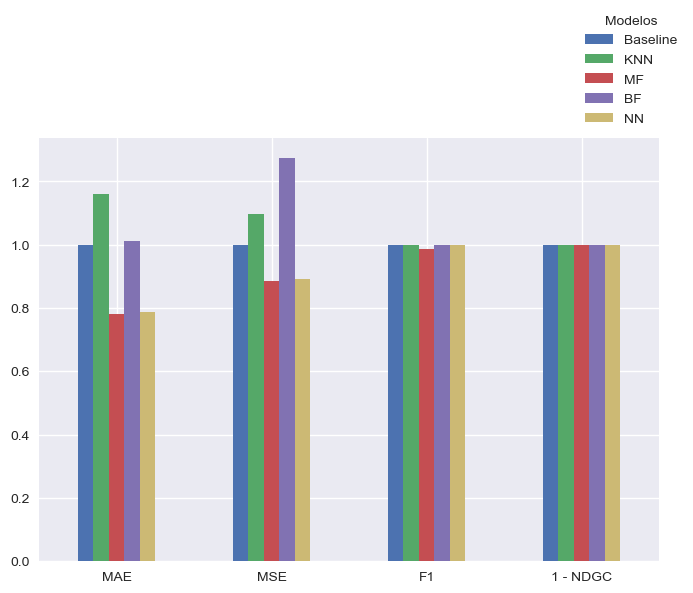

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8')
metrics = pd.DataFrame()
metrics['Baseline'] = [bs_mae, bs_rmse, bs_f1, bs_ndcg]
metrics['KNN'] = [knn_mae, knn_rmse, knn_f1, knn_ndcg]
metrics['MF'] = [mf_mae, mf_rmse, mf_f1, mf_ndcg]
metrics['BF'] = [bf_mae, bf_rmse, bf_f1, bf_ndcg]
metrics['NN'] = [nn_mae, nn_rmse, nn_f1, nn_ndcg]

metrics.index = ['MAE', 'MSE', 'F1', '1 - NDGC']
metrics.loc['1 - NDGC'] = 1 - metrics.loc['1 - NDGC']
metrics_norm = metrics.apply(lambda s: s/s.at['Baseline'], axis=1, result_type='expand')

ax = metrics_norm.plot.bar()
[ax.get_xticklabels()[i].set_rotation(0) for i in range(len(ax.get_xticklabels()))]
ax.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='lower right')
plt.savefig('metrics.png', bbox_inches='tight')